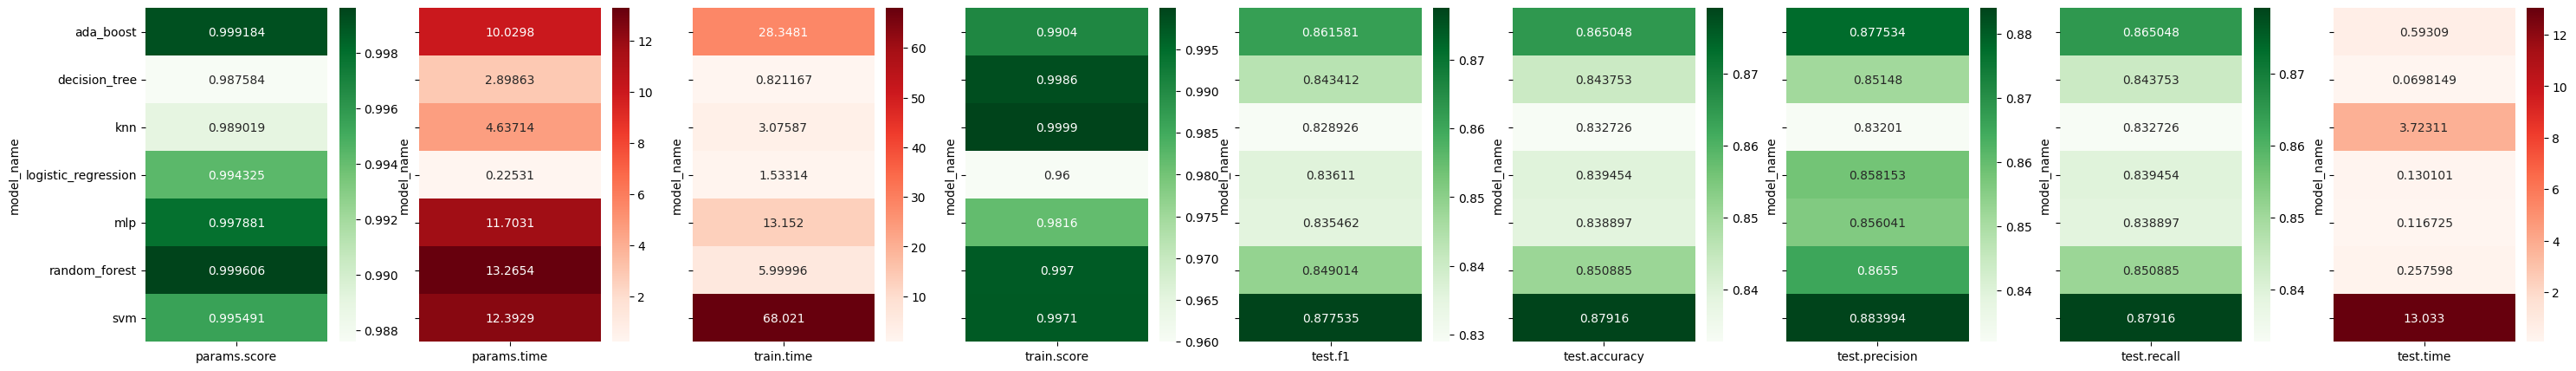

,model_name,params.score,params.time,train.time,train.score,test.f1,test.accuracy,test.precision,test.recall,test.time
0,decision_tree,0.987584,2.898627,0.821167,0.9986,0.843412,0.843753,0.851480,0.843753,0.069815
1,random_forest,0.999606,13.265369,5.999960,0.9970,0.849014,0.850885,0.865500,0.850885,0.257598
2,knn,0.989019,4.637136,3.075871,0.9999,0.828926,0.832726,0.832010,0.832726,3.723105
3,logistic_regression,0.994325,0.225310,1.533143,0.9600,0.836110,0.839454,0.858153,0.839454,0.130101
4,mlp,0.997881,11.703055,13.151988,0.9816,0.835462,0.838897,0.856041,0.838897,0.116725
5,ada_boost,0.999184,10.029763,28.348078,0.9904,0.861581,0.865048,0.877534,0.865048,0.593090
6,svm,0.995491,12.392923,68.020993,0.9971,0.877535,0.879160,0.883994,0.879160,13.032986


In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt


def process_results(file_name):
    with open(file_name) as f:
        results = json.load(f)

    processed = []
    for model_name in results:
        res = results[model_name]
        res['model_name'] = model_name

        processed.append(
            res
        )

    return processed


def generate_heatmaps(normalised):
    figure, axes = plt.subplots(1, 9, figsize=(4*9, 5), sharey=True)

    cmaps = ['Greens', 'Reds', 'Reds', 'Greens', 'Greens', 'Greens', 'Greens', 'Greens', 'Reds']

    # create heat maps for each of the columns of the normalised dataframe
    for i, (col, cmap) in enumerate(zip(normalised.columns[1:], cmaps)):
        if col == 'model_name':
            continue

        # create a new dataframe with the model name and the column
        df = pd.DataFrame({
            'model_name': normalised['model_name'],
            col: normalised[col]
        })

        # create a pivot table with the model name as the index and the column as the value
        df = df.pivot_table(index='model_name', values=col)

        # plot the pivot table as a heatmap
        sns.heatmap(df, annot=True, cmap=cmap, ax=axes[i], fmt='g')

    plt.show()


df = process_results('../artefacts/6/results_kdd.json')
normalised = pd.json_normalize(df)
generate_heatmaps(normalised)
normalised


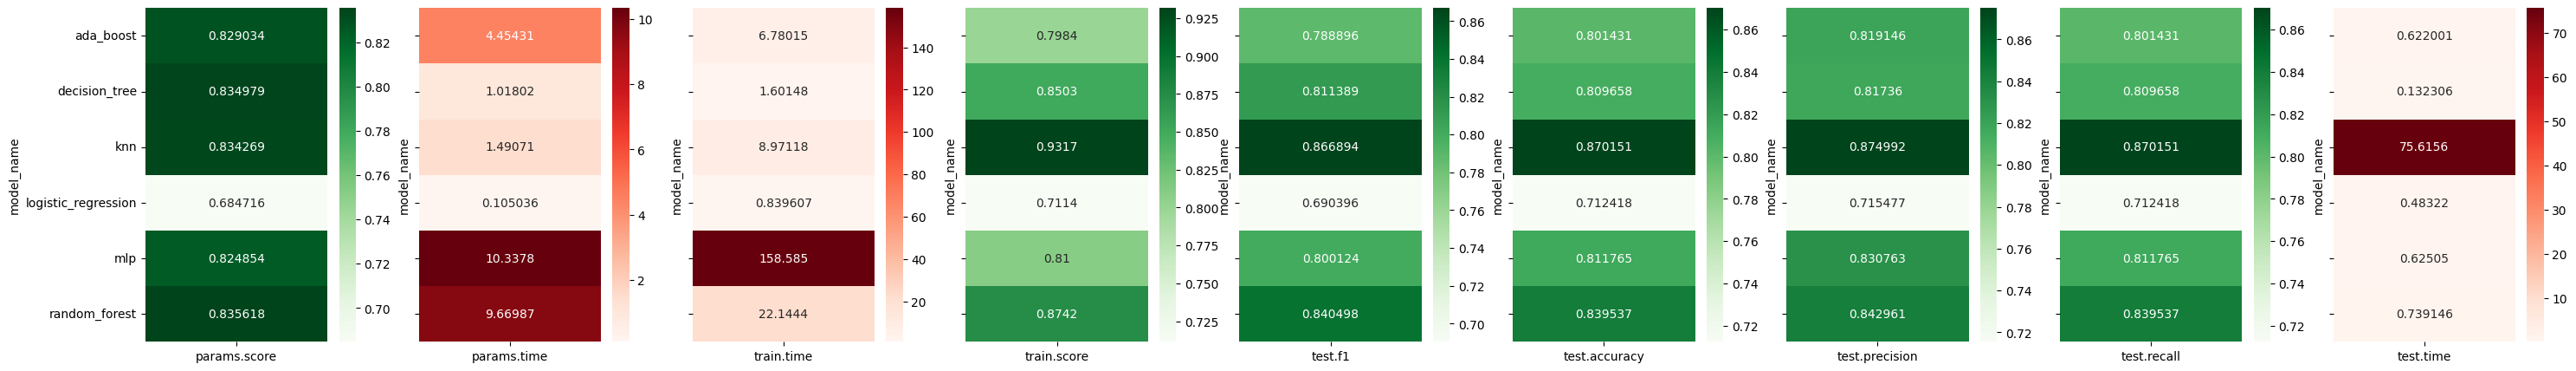

,model_name,params.score,params.time,train.time,train.score,test.f1,test.accuracy,test.precision,test.recall,test.time
0,decision_tree,0.834979,1.018017,1.601484,0.8503,0.811389,0.809658,0.817360,0.809658,0.132306
1,random_forest,0.835618,9.669869,22.144424,0.8742,0.840498,0.839537,0.842961,0.839537,0.739146
2,knn,0.834269,1.490710,8.971184,0.9317,0.866894,0.870151,0.874992,0.870151,75.615572
3,logistic_regression,0.684716,0.105036,0.839607,0.7114,0.690396,0.712418,0.715477,0.712418,0.483220
4,mlp,0.824854,10.337832,158.585030,0.8100,0.800124,0.811765,0.830763,0.811765,0.625050
5,ada_boost,0.829034,4.454307,6.780149,0.7984,0.788896,0.801431,0.819146,0.801431,0.622001


In [2]:
df = process_results('../artefacts/6/results_iot.json')
normalised = pd.json_normalize(df)
generate_heatmaps(normalised)
normalised